In [1]:
아파트 
사업체
유통업체
기초생활수급자
수소충전소위치
전기충전소 위치
수입차
교통량

SyntaxError: invalid syntax (<ipython-input-1-e9e1dff1d3df>, line 6)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

from matplotlib import rc, font_manager

rc('font', family='NanumGothic')

[사업체 데이터] - 조경아 EDA
연령대별 사업체 현황(동마다 대표자수,직원수)
동별 사업체 현황(동마다 직원수, 사업체수)
서울시 유통업체 현황(동별 백화점, 대형마트 수)

In [3]:
import glob, os
os.chdir("C:/Users/Cho Gyung Ah/Documents/GitHub/Hydrogen-Vehicle/Data/data")
for file in glob.glob("*"):
    print(file)

aptapt.xlsx
aptapt1.xlsx
big_building_4.csv
dong.csv
dong_1.csv
found_big_building_coor
geocode_4.ipynb
gugugu.csv
missing_big_building_coor
piddam.csv
x값.ipynb
★(월간)KB주택가격동향_시계열(2019.07)(2003버전).xls
구별 수입차.txt
서울시 국민기초생활보장 수급자 (동별) 통계.txt
서울시 대표자 연령대별 사업체 현황 (동별) 통계.txt
서울시 사업체현황.txt
서울시 유통업체현황 (동별) 통계 .txt
시세통계_면적당평균가_201907기준(2003버전).xls
전국전기차충전소표준데이터.csv
주택종류별_주택통계.txt
행정동.csv
행정동.txt
행정동분류.csv


In [4]:
import pandas as pd

In [5]:
450 - 25-1

424

# 행정동 기준

In [6]:
#2018년 데이터
index1 = pd.read_csv("행정동.txt", sep='\t', usecols=[1,2,3])

In [7]:
index1=index1[index1.동 != '합계']
index1=index1[index1.동 != '본청']
index1=index1[index1.동 != '소계']
index1=index1[index1.동 != '기타']
index1=index1[index1.동 != '동']

In [8]:
index1.head()

,자치구,동,면적
3,종로구,사직동,1.23
4,종로구,삼청동,1.49
5,종로구,부암동,2.27
6,종로구,평창동,8.87
7,종로구,무악동,0.36


In [9]:
index1.columns

Index(['자치구', '동', '면적'], dtype='object')

In [10]:
index1[index1.duplicated(subset=['동'], keep='first')].sort_values(by='동')

,자치구,동,면적
382,강남구,신사동,1.89


In [11]:
index1[(index1.동=='신사동')]

,자치구,동,면적
351,관악구,신사동,1.38
382,강남구,신사동,1.89


In [12]:
len(index1)

424

In [13]:
index1.to_csv('행정동.csv')

## 구입수입차

In [14]:
imp_car = pd.read_csv("구별 수입차.txt", sep='\t')

In [15]:
imp_car.head()

,기간,자치구별,합계,승용차,승합차,화물차,특수차
0,2018.12,합계,"483,823","478,139","1,652","3,210",822
1,2018.12,종로구,"9,497","9,329",71,59,38
2,2018.12,중구,"11,403","11,142",67,144,50
3,2018.12,용산구,"22,513","22,317",59,131,6
4,2018.12,성동구,"21,312","21,132",78,91,11


In [16]:
imp_car=imp_car[imp_car.자치구별 != '합계']
imp_car=imp_car[imp_car.자치구별 != '본청']
imp_car=imp_car[imp_car.자치구별 != '소계']
imp_car=imp_car[imp_car.자치구별 != '기타']

In [17]:
imp_car=imp_car[['자치구별', '합계', '승용차', '승합차', '화물차', '특수차']]

In [18]:
imp_car.columns=['자치구', '합계', '승용차', '승합차', '화물차', '특수차']

In [19]:
imp_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 6 columns):
자치구    25 non-null object
합계     25 non-null object
승용차    25 non-null object
승합차    25 non-null object
화물차    25 non-null object
특수차    25 non-null int64
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


In [20]:
imp_car.iloc[:,1:] = imp_car.iloc[:,1:].replace({',': ''}, regex=True)

In [21]:
imp_car.iloc[:,1:] = imp_car.iloc[:,1:].astype('float')

In [22]:
imp_car.corr()

,합계,승용차,승합차,화물차,특수차
합계,1.000000,0.999990,0.934914,0.757772,0.253239
승용차,0.999990,1.000000,0.934910,0.755467,0.249646
승합차,0.934914,0.934910,1.000000,0.674001,0.178706
화물차,0.757772,0.755467,0.674001,1.000000,0.431004
특수차,0.253239,0.249646,0.178706,0.431004,1.000000


In [23]:
imp_car=imp_car[['자치구', '합계','화물차', '특수차']]

In [24]:
imp_car.columns=['자치구', '수입차합계','수입화물차', '수입특수차']

# company

In [25]:
company = pd.read_csv('서울시 사업체현황.txt', delimiter="	", header=[0,2])

In [26]:
company.head()

기간  자치구    동       합계                                            \
     기간  자치구    동     사업체수    여성대표자          계          남          여   
0  2017   합계   합계  822,863  278,152  5,119,913  2,848,150  2,271,763   
1  2017  종로구   소계   40,490   13,577    268,702    154,100    114,602   
2  2017  종로구  사직동    3,544    1,147     52,489     31,029     21,460   
3  2017  종로구  삼청동      753      360      4,507      2,225      2,282   
4  2017  종로구  부암동      567      235      4,147      2,137      2,010   

  농업 임업 및 어업       ... 공공행정 국방 및 사회보장 행정          교육 서비스업           \
        사업체수 종사자수  ...              사업체수     종사자수    사업체수     종사자수   
0         29  469  ...             1,296  138,150  34,762  341,732   
1          3   30  ...                90   16,504     852   13,317   
2          1   16  ...                19    7,667      86      898   
3          -    -  ...                 4    1,229      16      279   
4          -    -  ...                 3       58      43    1,543   

  보건업 및 사회복지 서비스업          예술 스포츠 및 여가관련 서비스업         협회 및 단체 수리 및 기타 개인 서비스업  \
             사업체수     종사자수               사업체수    종사자수                    사업체수   
0          28,683  358,563             22,913  86,452                  69,637   
1             732   15,954                926   6,198                   2,506   
2              97      764                 95   1,546                     250   
3               7       28                 17     172                      27   
4              12      153                 15      73                      94   

            
      종사자수  
0  190,963  
1    8,275  
2      920  
3      216  
4      806  

[5 rows x 46 columns]

In [27]:
company.columns = ['_'.join(col) for col in company.columns.values]

In [28]:
company.columns = ['기간', '자치구', '동', '합계_사업체수', '합계_여성대표자', '합계_계', '합계_남',
       '합계_여', '농업 임업 및 어업_사업체수', '농업 임업 및 어업_종사자수', '광업_사업체수', '광업_종사자수',
       '제조업_사업체수', '제조업_종사자수', '전기 가스 증기 및 공기조절 공급업_사업체수',
       '전기 가스 증기 및 공기조절 공급업_종사자수', '수도 하수 및 폐기물 처리 원료 재생업_사업체수',
       '수도 하수 및 폐기물 처리 원료 재생업_종사자수', '건설업_사업체수', '건설업_종사자수', '도매 및 소매업_사업체수',
       '도매 및 소매업_종사자수', '운수 및 창고업_사업체수', '운수 및 창고업_종사자수', '숙박 및 음식점업_사업체수',
       '숙박 및 음식점업_종사자수', '정보통신업_사업체수', '정보통신업_종사자수', '금융 및 보험업_사업체수',
       '금융 및 보험업_종사자수', '부동산업_사업체수', '부동산업_종사자수', '전문 과학 및 기술 서비스업_사업체수',
       '전문 과학 및 기술 서비스업_종사자수', '사업시설 관리 사업 지원 및 임대 서비스업_사업체수',
       '사업시설 관리 사업 지원 및 임대 서비스업_종사자수', '공공행정 국방 및 사회보장 행정_사업체수',
       '공공행정 국방 및 사회보장 행정_종사자수', '교육 서비스업_사업체수', '교육 서비스업_종사자수',
       '보건업 및 사회복지 서비스업_사업체수', '보건업 및 사회복지 서비스업_종사자수',
       '예술 스포츠 및 여가관련 서비스업_사업체수', '예술 스포츠 및 여가관련 서비스업_종사자수',
       '협회 및 단체 수리 및 기타 개인 서비스업_사업체수', '협회 및 단체 수리 및 기타 개인 서비스업_종사자수']

In [29]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 46 columns):
기간                              450 non-null int64
자치구                             450 non-null object
동                               450 non-null object
합계_사업체수                         450 non-null object
합계_여성대표자                        450 non-null object
합계_계                            450 non-null object
합계_남                            450 non-null object
합계_여                            450 non-null object
농업 임업 및 어업_사업체수                 450 non-null object
농업 임업 및 어업_종사자수                 450 non-null object
광업_사업체수                         450 non-null object
광업_종사자수                         450 non-null object
제조업_사업체수                        450 non-null object
제조업_종사자수                        450 non-null object
전기 가스 증기 및 공기조절 공급업_사업체수        450 non-null object
전기 가스 증기 및 공기조절 공급업_종사자수        450 non-null object
수도 하수 및 폐기물 처리 원료 재생업_사업체수      450 non-null object
수도 하수 및 폐기물 

In [30]:
from datetime import datetime

In [31]:
cols = ['합계_사업체수', '합계_여성대표자', '합계_계', '합계_남',
       '합계_여', '농업 임업 및 어업_사업체수', '농업 임업 및 어업_종사자수', '광업_사업체수', '광업_종사자수',
       '제조업_사업체수', '제조업_종사자수', '전기 가스 증기 및 공기조절 공급업_사업체수',
       '전기 가스 증기 및 공기조절 공급업_종사자수', '수도 하수 및 폐기물 처리 원료 재생업_사업체수',
       '수도 하수 및 폐기물 처리 원료 재생업_종사자수', '건설업_사업체수', '건설업_종사자수', '도매 및 소매업_사업체수',
       '도매 및 소매업_종사자수', '운수 및 창고업_사업체수', '운수 및 창고업_종사자수', '숙박 및 음식점업_사업체수',
       '숙박 및 음식점업_종사자수', '정보통신업_사업체수', '정보통신업_종사자수', '금융 및 보험업_사업체수',
       '금융 및 보험업_종사자수', '부동산업_사업체수', '부동산업_종사자수', '전문 과학 및 기술 서비스업_사업체수',
       '전문 과학 및 기술 서비스업_종사자수', '사업시설 관리 사업 지원 및 임대 서비스업_사업체수',
       '사업시설 관리 사업 지원 및 임대 서비스업_종사자수', '공공행정 국방 및 사회보장 행정_사업체수',
       '공공행정 국방 및 사회보장 행정_종사자수', '교육 서비스업_사업체수', '교육 서비스업_종사자수',
       '보건업 및 사회복지 서비스업_사업체수', '보건업 및 사회복지 서비스업_종사자수',
       '예술 스포츠 및 여가관련 서비스업_사업체수', '예술 스포츠 및 여가관련 서비스업_종사자수',
       '협회 및 단체 수리 및 기타 개인 서비스업_사업체수', '협회 및 단체 수리 및 기타 개인 서비스업_종사자수']

# pass them to df.replace(), specifying each char and it's replacement:
company[cols] = company[cols].replace({',': '', '-':'0'}, regex=True)

In [32]:
company.기간 = company.기간.astype('int')
company.iloc[:,1:3] = company.iloc[:,1:3].astype('str')
company.iloc[:,3:] = company.iloc[:,3:].astype('int')

In [33]:
for i in range(len(company.columns)) :
    print(list(company.columns)[i],"결측치 수 :",sum(company[list(company.columns)[i]].isnull()))

기간 결측치 수 : 0
자치구 결측치 수 : 0
동 결측치 수 : 0
합계_사업체수 결측치 수 : 0
합계_여성대표자 결측치 수 : 0
합계_계 결측치 수 : 0
합계_남 결측치 수 : 0
합계_여 결측치 수 : 0
농업 임업 및 어업_사업체수 결측치 수 : 0
농업 임업 및 어업_종사자수 결측치 수 : 0
광업_사업체수 결측치 수 : 0
광업_종사자수 결측치 수 : 0
제조업_사업체수 결측치 수 : 0
제조업_종사자수 결측치 수 : 0
전기 가스 증기 및 공기조절 공급업_사업체수 결측치 수 : 0
전기 가스 증기 및 공기조절 공급업_종사자수 결측치 수 : 0
수도 하수 및 폐기물 처리 원료 재생업_사업체수 결측치 수 : 0
수도 하수 및 폐기물 처리 원료 재생업_종사자수 결측치 수 : 0
건설업_사업체수 결측치 수 : 0
건설업_종사자수 결측치 수 : 0
도매 및 소매업_사업체수 결측치 수 : 0
도매 및 소매업_종사자수 결측치 수 : 0
운수 및 창고업_사업체수 결측치 수 : 0
운수 및 창고업_종사자수 결측치 수 : 0
숙박 및 음식점업_사업체수 결측치 수 : 0
숙박 및 음식점업_종사자수 결측치 수 : 0
정보통신업_사업체수 결측치 수 : 0
정보통신업_종사자수 결측치 수 : 0
금융 및 보험업_사업체수 결측치 수 : 0
금융 및 보험업_종사자수 결측치 수 : 0
부동산업_사업체수 결측치 수 : 0
부동산업_종사자수 결측치 수 : 0
전문 과학 및 기술 서비스업_사업체수 결측치 수 : 0
전문 과학 및 기술 서비스업_종사자수 결측치 수 : 0
사업시설 관리 사업 지원 및 임대 서비스업_사업체수 결측치 수 : 0
사업시설 관리 사업 지원 및 임대 서비스업_종사자수 결측치 수 : 0
공공행정 국방 및 사회보장 행정_사업체수 결측치 수 : 0
공공행정 국방 및 사회보장 행정_종사자수 결측치 수 : 0
교육 서비스업_사업체수 결측치 수 : 0
교육 서비스업_종사자수 결측치 수 : 0
보건업 및 사회복지 서비스업_사업체수 결측치 수 : 0
보건업 및 사회복지 서

In [34]:
a = company.corr()

In [35]:
a.합계_사업체수.sort_values(ascending=False)

합계_사업체수                         1.000000
합계_여성대표자                        0.999701
숙박 및 음식점업_사업체수                  0.998618
숙박 및 음식점업_종사자수                  0.997924
협회 및 단체 수리 및 기타 개인 서비스업_종사자수    0.997900
합계_여                            0.997806
협회 및 단체 수리 및 기타 개인 서비스업_사업체수    0.997739
예술 스포츠 및 여가관련 서비스업_사업체수         0.997196
합계_계                            0.997100
공공행정 국방 및 사회보장 행정_사업체수          0.997045
보건업 및 사회복지 서비스업_사업체수            0.996794
부동산업_사업체수                       0.996755
합계_남                            0.996241
예술 스포츠 및 여가관련 서비스업_종사자수         0.995987
건설업_사업체수                        0.995973
도매 및 소매업_사업체수                   0.995799
보건업 및 사회복지 서비스업_종사자수            0.995792
도매 및 소매업_종사자수                   0.995772
사업시설 관리 사업 지원 및 임대 서비스업_사업체수    0.995734
교육 서비스업_사업체수                    0.994474
교육 서비스업_종사자수                    0.994027
수도 하수 및 폐기물 처리 원료 재생업_사업체수      0.992551
부동산업_종사자수                       0.992161
운수 및 창고업_사업체수                   0.990217
금융 및 보험업_사업체수   

In [36]:
num_company = company[['자치구', '동', '합계_사업체수']]

num_company=num_company[num_company.동 != '합계']

num_company=num_company[num_company.동 != '소계']

In [37]:
len(num_company)

424

# Comany_ceo

In [38]:
com_ceo = pd.read_csv('서울시 대표자 연령대별 사업체 현황 (동별) 통계.txt', delimiter="	", header=[0,1])

In [39]:
com_ceo.columns = ['_'.join(col) for col in com_ceo.columns.values]

In [40]:
com_ceo.columns

Index(['기간_기간', '자치구_자치구', '동_동', '합계_사업체수', '합계_종사자수', '20대 이하(29세 이하)_사업체수',
       '20대 이하(29세 이하)_종사자수', '30대(30~39세)_사업체수', '30대(30~39세)_종사자수',
       '40대(40~49세)_사업체수', '40대(40~49세)_종사자수', '50대(50~59세)_사업체수',
       '50대(50~59세)_종사자수', '60대 이상(60세 이상)_사업체수', '60대 이상(60세 이상)_종사자수'],
      dtype='object')

In [41]:
com_ceo.columns = ['기간', '자치구', '동', '합계_사업체수', '합계_종사자수', '20대 이하(29세 이하)_사업체수',
       '20대 이하(29세 이하)_종사자수', '30대(30~39세)_사업체수', '30대(30~39세)_종사자수',
       '40대(40~49세)_사업체수', '40대(40~49세)_종사자수', '50대(50~59세)_사업체수',
       '50대(50~59세)_종사자수', '60대 이상(60세 이상)_사업체수', '60대 이상(60세 이상)_종사자수']

In [42]:
com_ceo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
기간                     450 non-null int64
자치구                    450 non-null object
동                      450 non-null object
합계_사업체수                450 non-null object
합계_종사자수                450 non-null object
20대 이하(29세 이하)_사업체수    450 non-null object
20대 이하(29세 이하)_종사자수    450 non-null object
30대(30~39세)_사업체수       450 non-null object
30대(30~39세)_종사자수       450 non-null object
40대(40~49세)_사업체수       450 non-null object
40대(40~49세)_종사자수       450 non-null object
50대(50~59세)_사업체수       450 non-null object
50대(50~59세)_종사자수       450 non-null object
60대 이상(60세 이상)_사업체수    450 non-null object
60대 이상(60세 이상)_종사자수    450 non-null object
dtypes: int64(1), object(14)
memory usage: 52.8+ KB


In [43]:
cols = ['합계_사업체수', '합계_종사자수', '20대 이하(29세 이하)_사업체수',
       '20대 이하(29세 이하)_종사자수', '30대(30~39세)_사업체수', '30대(30~39세)_종사자수',
       '40대(40~49세)_사업체수', '40대(40~49세)_종사자수', '50대(50~59세)_사업체수',
       '50대(50~59세)_종사자수', '60대 이상(60세 이상)_사업체수', '60대 이상(60세 이상)_종사자수']

# pass them to df.replace(), specifying each char and it's replacement:
com_ceo[cols] = com_ceo[cols].replace({',': '', '-':'0'}, regex=True)

In [44]:
com_ceo.기간 = com_ceo.기간.astype('int')
com_ceo.iloc[:,1:3] = com_ceo.iloc[:,1:3].astype('str')
com_ceo.iloc[:,3:] = com_ceo.iloc[:,3:].astype('int')

In [45]:
for i in range(len(com_ceo.columns)) :
    print(list(com_ceo.columns)[i],"결측치 수 :",sum(com_ceo[list(com_ceo.columns)[i]].isnull()))

기간 결측치 수 : 0
자치구 결측치 수 : 0
동 결측치 수 : 0
합계_사업체수 결측치 수 : 0
합계_종사자수 결측치 수 : 0
20대 이하(29세 이하)_사업체수 결측치 수 : 0
20대 이하(29세 이하)_종사자수 결측치 수 : 0
30대(30~39세)_사업체수 결측치 수 : 0
30대(30~39세)_종사자수 결측치 수 : 0
40대(40~49세)_사업체수 결측치 수 : 0
40대(40~49세)_종사자수 결측치 수 : 0
50대(50~59세)_사업체수 결측치 수 : 0
50대(50~59세)_종사자수 결측치 수 : 0
60대 이상(60세 이상)_사업체수 결측치 수 : 0
60대 이상(60세 이상)_종사자수 결측치 수 : 0


In [46]:
a = com_ceo.corr()

In [47]:
a.합계_사업체수.sort_values(ascending=False)

합계_사업체수                1.000000
50대(50~59세)_사업체수       0.999855
40대(40~49세)_사업체수       0.999646
60대 이상(60세 이상)_사업체수    0.999160
30대(30~39세)_사업체수       0.998711
20대 이하(29세 이하)_사업체수    0.998622
20대 이하(29세 이하)_종사자수    0.998259
합계_종사자수                0.997100
30대(30~39세)_종사자수       0.996909
50대(50~59세)_종사자수       0.996615
60대 이상(60세 이상)_종사자수    0.996121
40대(40~49세)_종사자수       0.995954
기간                          NaN
Name: 합계_사업체수, dtype: float64

- 상관관계 결과 각 변수들의 상광관계가 크므로 **대표자 사업체 수 & 사업체 수** 중에서 모든 변수들에 가장 큰 대표성을 갖는 **'합계_사업체수'** 를 선택하도록 한다. 

In [48]:
num_company.head()

,자치구,동,합계_사업체수
2,종로구,사직동,3544
3,종로구,삼청동,753
4,종로구,부암동,567
5,종로구,평창동,739
6,종로구,무악동,531


# 국민기초생활보장

In [49]:
underGDP = pd.read_csv('서울시 국민기초생활보장 수급자 (동별) 통계.txt', delimiter="	", header = [0,1], engine='python',  encoding='utf-8')

In [50]:
underGDP.head()

기간  자치구    동    총 수급자                  일반수급자          조건부 수급자          \
     기간  자치구    동       가구   시설       인원       가구       인원      가구      인원   
0  2018   합계   합계  197,278  604  290,222  169,271  227,396  23,360  44,271   
1  2018   본청   본청        -    8      880        -        -       -       -   
2  2018  종로구   소계    3,109   14    4,450    2,821    3,403     216     318   
3  2018  종로구  사직동       99    -      121       96      116       3       5   
4  2018  종로구  삼청동       34    -       48       25       31       7      14   

   특례수급자        시설수급자          
      가구     인원    시설      인원  
0  4,647  6,324   604  12,231  
1      -      -     8     880  
2     72     80    14     649  
3      -      -     -       -  
4      2      3     -       -

In [51]:
underGDP.columns = ['_'.join(col) for col in underGDP.columns.values]

In [52]:
underGDP.columns

Index(['기간_기간', '자치구_자치구', '동_동', '총 수급자_가구', '총 수급자_시설', '총 수급자_인원',
       '일반수급자_가구', '일반수급자_인원', '조건부 수급자_가구', '조건부 수급자_인원', '특례수급자_가구',
       '특례수급자_인원', '시설수급자_시설', '시설수급자_인원'],
      dtype='object')

In [53]:
underGDP.columns = ['기간', '자치구', '동', '총_수급자_가구', '총_수급자_시설', '총_수급자_인원',
       '일반수급자_가구', '일반수급자_인원', '조건부_수급자_가구', '조건부_수급자_인원', '특례수급자_가구',
       '특례수급자_인원', '시설수급자_시설', '시설수급자_인원']

In [54]:
underGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 14 columns):
기간            475 non-null int64
자치구           475 non-null object
동             475 non-null object
총_수급자_가구      475 non-null object
총_수급자_시설      475 non-null object
총_수급자_인원      475 non-null object
일반수급자_가구      475 non-null object
일반수급자_인원      475 non-null object
조건부_수급자_가구    475 non-null object
조건부_수급자_인원    475 non-null object
특례수급자_가구      475 non-null object
특례수급자_인원      475 non-null object
시설수급자_시설      475 non-null object
시설수급자_인원      475 non-null object
dtypes: int64(1), object(13)
memory usage: 52.0+ KB


In [55]:
cols = ['총_수급자_가구', '총_수급자_시설', '총_수급자_인원',
       '일반수급자_가구', '일반수급자_인원', '조건부_수급자_가구', '조건부_수급자_인원', '특례수급자_가구',
       '특례수급자_인원', '시설수급자_시설', '시설수급자_인원']

# pass them to df.replace(), specifying each char and it's replacement:
underGDP[cols] = underGDP[cols].replace({',': '', '-':'0'}, regex=True)

In [56]:
underGDP.기간 = underGDP.기간.astype('int')
underGDP.iloc[:,1:3] = underGDP.iloc[:,1:3].astype('str')
underGDP.iloc[:,3:] = underGDP.iloc[:,3:].astype('int')

In [57]:
for i in range(len(underGDP.columns)) :
    print(list(underGDP.columns)[i],"결측치 수 :",sum(underGDP[list(underGDP.columns)[i]].isnull()))

기간 결측치 수 : 0
자치구 결측치 수 : 0
동 결측치 수 : 0
총_수급자_가구 결측치 수 : 0
총_수급자_시설 결측치 수 : 0
총_수급자_인원 결측치 수 : 0
일반수급자_가구 결측치 수 : 0
일반수급자_인원 결측치 수 : 0
조건부_수급자_가구 결측치 수 : 0
조건부_수급자_인원 결측치 수 : 0
특례수급자_가구 결측치 수 : 0
특례수급자_인원 결측치 수 : 0
시설수급자_시설 결측치 수 : 0
시설수급자_인원 결측치 수 : 0


In [58]:
a = underGDP.corr()

In [59]:
a.총_수급자_가구.sort_values(ascending=False)

총_수급자_가구      1.000000
일반수급자_가구      0.999981
일반수급자_인원      0.999931
총_수급자_인원      0.999865
조건부_수급자_가구    0.998804
조건부_수급자_인원    0.998474
특례수급자_가구      0.994186
특례수급자_인원      0.993587
시설수급자_시설      0.973538
총_수급자_시설      0.973538
시설수급자_인원      0.960688
기간                 NaN
Name: 총_수급자_가구, dtype: float64

In [60]:
underGDP = underGDP[['자치구', '동', '총_수급자_가구']]

In [61]:
underGDP=underGDP[underGDP.동 != '합계']
underGDP=underGDP[underGDP.동 != '본청']
underGDP=underGDP[underGDP.동 != '소계']
underGDP=underGDP[underGDP.동 != '기타']

In [62]:
len(underGDP)

423

In [63]:
num_company.동.replace('여의도동','여의동', inplace=True)

In [64]:
set(underGDP.동)-set(num_company.동)

set()

In [65]:
set(num_company.동)-set(underGDP.동)

{'둔촌1동'}

In [66]:
underGDP[underGDP['동'].str.contains(r'둔촌')]

,자치구,동,총_수급자_가구
470,강동구,둔촌2동,281


# store

In [67]:
store = pd.read_csv('서울시 유통업체현황 (동별) 통계 .txt', delimiter="	", header=[0,3])

In [68]:
store.head()

기간  자치구            동   합계                        대형마트           \
     기간  자치구            동   개소       매장면적       건물연면적   개소     매장면적   
0  2017   합계           합계  467  5,393,420  27,016,613   61  857,904   
1  2017  종로구           소계   12    133,876     444,978    -        -   
2  2017  종로구  종로1.2.3.4가동    6     54,063     333,469    -        -   
3  2017  종로구      종로5·6가동    3     71,445      83,436    -        -   
4  2017  종로구         창신1동    1      3,660       9,625    -        -   

             백화점  ...        전문점 쇼핑센터                     복합쇼핑몰           \
       건물연면적  개소  ...      건물연면적   개소     매장면적      건물연면적    개소     매장면적   
0  6,237,959  31  ...  2,829,420   36  784,804  3,761,856    10  278,711   
1          -   -  ...    168,311    -        -          -     -        -   
2          -   -  ...    168,311    -        -          -     -        -   
3          -   -  ...          -    -        -          -     -        -   
4          -   -  ...          -    -        -          -     -        -   

             그밖의 대규모점포                        
       건물연면적        개소       매장면적      건물연면적  
0  1,534,046       307  2,153,637  8,609,705  
1          -        10    117,620    276,667  
2          -         4     37,807    165,158  
3          -         3     71,445     83,436  
4          -         1      3,660      9,625  

[5 rows x 24 columns]

In [69]:
store.columns = ['_'.join(col) for col in store.columns.values]

In [70]:
store.columns = ['기간', '자치구', '동', 'store_총_개소', '합계_매장면적', '합계_건물연면적', '대형마트_개소',
       '대형마트_매장면적', '대형마트_건물연면적', '백화점_개소', '백화점_매장면적', '백화점_건물연면적', '전문점_개소',
       '전문점_매장면적', '전문점_건물연면적', '쇼핑센터_개소', '쇼핑센터_매장면적', '쇼핑센터_건물연면적',
       '복합쇼핑몰_개소', '복합쇼핑몰_매장면적', '복합쇼핑몰_건물연면적', '그밖의 대규모점포_개소',
       '그밖의 대규모점포_매장면적', '그밖의 대규모점포_건물연면적']

In [71]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 24 columns):
기간                 266 non-null int64
자치구                266 non-null object
동                  266 non-null object
store_총_개소         266 non-null int64
합계_매장면적            266 non-null object
합계_건물연면적           266 non-null object
대형마트_개소            266 non-null object
대형마트_매장면적          266 non-null object
대형마트_건물연면적         266 non-null object
백화점_개소             266 non-null object
백화점_매장면적           266 non-null object
백화점_건물연면적          266 non-null object
전문점_개소             266 non-null object
전문점_매장면적           266 non-null object
전문점_건물연면적          266 non-null object
쇼핑센터_개소            266 non-null object
쇼핑센터_매장면적          266 non-null object
쇼핑센터_건물연면적         266 non-null object
복합쇼핑몰_개소           266 non-null object
복합쇼핑몰_매장면적         266 non-null object
복합쇼핑몰_건물연면적        266 non-null object
그밖의 대규모점포_개소       266 non-null object
그밖의 대규모점포_매장면적     266 non-null object


In [72]:
cols = ['기간', '자치구', '동', 'store_총_개소', '합계_매장면적', '합계_건물연면적', '대형마트_개소',
       '대형마트_매장면적', '대형마트_건물연면적', '백화점_개소', '백화점_매장면적', '백화점_건물연면적', '전문점_개소',
       '전문점_매장면적', '전문점_건물연면적', '쇼핑센터_개소', '쇼핑센터_매장면적', '쇼핑센터_건물연면적',
       '복합쇼핑몰_개소', '복합쇼핑몰_매장면적', '복합쇼핑몰_건물연면적', '그밖의 대규모점포_개소',
       '그밖의 대규모점포_매장면적', '그밖의 대규모점포_건물연면적']

# pass them to df.replace(), specifying each char and it's replacement:
store[cols] = store[cols].replace({',': '', '-':'0'}, regex=True)

In [73]:
store.기간 = store.기간.astype('int')
store.iloc[:,1:3] = store.iloc[:,1:3].astype('str')
store.iloc[:,3:] = store.iloc[:,3:].astype('int')

In [74]:
for i in range(len(store.columns)) :
    print(list(store.columns)[i],"결측치 수 :",sum(store[list(store.columns)[i]].isnull()))

기간 결측치 수 : 0
자치구 결측치 수 : 0
동 결측치 수 : 0
store_총_개소 결측치 수 : 0
합계_매장면적 결측치 수 : 0
합계_건물연면적 결측치 수 : 0
대형마트_개소 결측치 수 : 0
대형마트_매장면적 결측치 수 : 0
대형마트_건물연면적 결측치 수 : 0
백화점_개소 결측치 수 : 0
백화점_매장면적 결측치 수 : 0
백화점_건물연면적 결측치 수 : 0
전문점_개소 결측치 수 : 0
전문점_매장면적 결측치 수 : 0
전문점_건물연면적 결측치 수 : 0
쇼핑센터_개소 결측치 수 : 0
쇼핑센터_매장면적 결측치 수 : 0
쇼핑센터_건물연면적 결측치 수 : 0
복합쇼핑몰_개소 결측치 수 : 0
복합쇼핑몰_매장면적 결측치 수 : 0
복합쇼핑몰_건물연면적 결측치 수 : 0
그밖의 대규모점포_개소 결측치 수 : 0
그밖의 대규모점포_매장면적 결측치 수 : 0
그밖의 대규모점포_건물연면적 결측치 수 : 0


In [167]:
a = store.corr()

In [76]:
a.전문점_개소.sort_values(ascending=False)

전문점_개소             1.000000
전문점_매장면적           0.964913
store_총_개소         0.934375
합계_매장면적            0.934317
그밖의 대규모점포_개소       0.925761
합계_건물연면적           0.924672
대형마트_개소            0.919911
대형마트_건물연면적         0.915841
그밖의 대규모점포_매장면적     0.909186
대형마트_매장면적          0.905171
백화점_매장면적           0.902825
백화점_개소             0.900650
백화점_건물연면적          0.897490
그밖의 대규모점포_건물연면적    0.894284
쇼핑센터_매장면적          0.889667
쇼핑센터_개소            0.889028
전문점_건물연면적          0.876715
쇼핑센터_건물연면적         0.866781
복합쇼핑몰_개소           0.814200
복합쇼핑몰_매장면적         0.789700
복합쇼핑몰_건물연면적        0.735451
기간                      NaN
Name: 전문점_개소, dtype: float64

In [77]:
num_store = store[['자치구', '동', 'store_총_개소','백화점_개소','백화점_건물연면적','복합쇼핑몰_개소','복합쇼핑몰_건물연면적','전문점_개소', '전문점_건물연면적']]

In [78]:
num_store

,자치구,동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적
0,합계,합계,467,31,4043627,10,1534046,22,2829420
1,종로구,소계,12,0,0,0,0,2,168311
2,종로구,종로1.2.3.4가동,6,0,0,0,0,2,168311
3,종로구,종로5·6가동,3,0,0,0,0,0,0
4,종로구,창신1동,1,0,0,0,0,0,0
5,종로구,창신3동,1,0,0,0,0,0,0
6,종로구,숭인2동,1,0,0,0,0,0,0
7,중구,소계,53,3,257042,0,0,2,520932
8,중구,소공동,3,2,125379,0,0,0,0
9,중구,회현동,9,1,131663,0,0,0,0


In [79]:
num_store=num_store[num_store.동 != '합계']
num_store=num_store[num_store.동 != '본청']
num_store=num_store[num_store.동 != '소계']
num_store=num_store[num_store.동 != '기타']

In [80]:
len(num_store)

240

In [81]:
set(num_store.동)-set(num_company.동)

set()

# 아파트 m^2 당 편균 매매가

In [82]:
apt = pd.read_excel('시세통계_면적당평균가_201907기준(2003버전).xls', skiprows=range(0,4), usecols=[0,1,2,3,4,41])

In [83]:
apt = apt[(apt['시도']=='서울특별시')]

In [84]:
apt.columns

Index(['시도', '구시군', '구', '동읍면', '값', 201907], dtype='object')

In [85]:
apt = apt[['구시군', '동읍면', '값', 201907]]

In [86]:
apt.columns = ['자치구', '동', '값', '가격']

In [87]:
for i in range(len(apt.columns)) :
    print(list(apt.columns)[i],"결측치 수 :",sum(apt[list(apt.columns)[i]].isnull()))

자치구 결측치 수 : 2
동 결측치 수 : 52
값 결측치 수 : 0
가격 결측치 수 : 0


In [88]:
apt_mae = apt[(apt['값']=='㎡당 매매평균가 ')]
apt_jun = apt[(apt['값']=='㎡당 전세평균가 ')]

In [89]:
apt_mae.iloc[0,0] = '합계'
apt_mae.iloc[0,1] = '합계'
apt_mae.fillna('소계', inplace= True)
apt_jun.iloc[0,0] = '합계'
apt_jun.iloc[0,1] = '합계'
apt_jun.fillna('소계', inplace= True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [90]:
apt_mae = apt_mae[['자치구', '동', '가격']]
apt_mae.columns = ['자치구', '동', '㎡당 매매평균가']

In [91]:
apt_jun = apt_jun[['자치구', '동', '가격']]
apt_jun.columns = ['자치구', '동', '㎡당 전세평균가']

In [92]:
apt_mae.head()

,자치구,동,㎡당 매매평균가
2,합계,합계,820.0
4,강남구,소계,1649.0
6,강남구,개포동,2538.0
8,강남구,논현동,1079.0
10,강남구,대치동,1672.0


In [93]:
apt_jun.head()

,자치구,동,㎡당 전세평균가
3,합계,합계,425.0
5,강남구,소계,639.0
7,강남구,개포동,563.0
9,강남구,논현동,577.0
11,강남구,대치동,710.0


In [94]:
apt = pd.merge(apt_mae, apt_jun, on=['자치구','동'])

In [95]:
apt=apt[apt.동 != '합계']
apt=apt[apt.동 != '본청']
apt=apt[apt.동 != '소계']
apt=apt[apt.동 != '기타']

apt.동.replace("가", "동", regex=True, inplace= True)

apt.동.replace("동", "", regex=True, inplace= True)

a = re.sub('[동]','', str(a))

### 아파트 동명 비교하기

In [96]:
a= apt.동.sort_values()
b= index1.동.sort_values()

In [97]:
inin = index1

In [98]:
apt['two'] = a.str[:2]
inin['two'] = b.str[:2]
apt['one'] = a.str[:1]
inin['one'] = b.str[:1]

In [99]:
apt = apt.merge(inin, how = 'left', on =['자치구','one'])

c = set(index1.동)-set(apt_edit.동_x)
index1[(index1['동'].isin(c))].sort_values('자치구')

In [101]:
apt.to_excel('aptapt1.xlsx')

In [134]:
apt_edit = pd.read_csv('piddam.csv',engine='python', encoding='cp949')

In [135]:
len(apt_edit)

425

In [136]:
apt_edit = apt_edit[['자치구', '동_x', '㎡당 매매평균가', '㎡당 전세평균가']]

In [137]:
apt_edit.columns=  ['자치구', '동', '㎡당 매매평균가', '㎡당 전세평균가']

# 동별 합치기

In [138]:
((set(num_store.동)-set(num_company.동))) | ((set(underGDP.동)-set(num_company.동)))

set()

In [139]:
num_company.shape

(424, 3)

In [140]:
num_store.shape

(240, 9)

In [141]:
underGDP.shape

(423, 3)

In [142]:
apt_edit.shape

(425, 4)

In [143]:
len(set(num_company.동) & set(num_store.동) & set(underGDP.동))

238

In [144]:
set(num_store.동) - set(num_company.동)

set()

In [145]:
index1 = index1[['자치구', '동', '면적']]

KeyError: "['면적'] not in index"

In [146]:
index1.columns = ['자치구', '동', '면적_동']

# 합치기

In [147]:
result = pd.merge(index1, num_store,how='outer', on=['자치구','동'])

In [148]:
result = pd.merge(result, num_company,how='outer', on=['자치구','동'])

In [149]:
result = pd.merge(result, underGDP, on=['자치구','동'], how='outer')

In [150]:
dong_2 = pd.merge(result, apt_edit, on=['자치구','동'], how='left')

In [151]:
dong_2 = pd.merge(dong_2, imp_car, on=['자치구'], how='left')

In [152]:
dong_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 17 columns):
자치구            424 non-null object
동              424 non-null object
면적_동           424 non-null object
store_총_개소     240 non-null float64
백화점_개소         240 non-null float64
백화점_건물연면적      240 non-null float64
복합쇼핑몰_개소       240 non-null float64
복합쇼핑몰_건물연면적    240 non-null float64
전문점_개소         240 non-null float64
전문점_건물연면적      240 non-null float64
합계_사업체수        424 non-null int32
총_수급자_가구       423 non-null float64
㎡당 매매평균가       424 non-null float64
㎡당 전세평균가       424 non-null float64
수입차합계          424 non-null float64
수입화물차          424 non-null float64
수입특수차          424 non-null float64
dtypes: float64(13), int32(1), object(3)
memory usage: 58.0+ KB


In [153]:
dong_1 = pd.read_csv('dong_1.csv',usecols = [1,2,3,4,5,6,7,8,9,10])

In [154]:
len(dong_1)

3392

In [155]:
dong = pd.merge(dong_2, dong_1, on=['자치구','동'], how='inner')

In [161]:
dong.fillna(0, inplace=True)

In [162]:
dong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3392 entries, 0 to 3391
Data columns (total 25 columns):
자치구            3392 non-null object
동              3392 non-null object
면적_동           3392 non-null object
store_총_개소     3392 non-null float64
백화점_개소         3392 non-null float64
백화점_건물연면적      3392 non-null float64
복합쇼핑몰_개소       3392 non-null float64
복합쇼핑몰_건물연면적    3392 non-null float64
전문점_개소         3392 non-null float64
전문점_건물연면적      3392 non-null float64
합계_사업체수        3392 non-null int32
총_수급자_가구       3392 non-null float64
㎡당 매매평균가       3392 non-null float64
㎡당 전세평균가       3392 non-null float64
수입차합계          3392 non-null float64
수입화물차          3392 non-null float64
수입특수차          3392 non-null float64
주택건설현황         3392 non-null int64
남자수            3392 non-null int64
여자수            3392 non-null int64
인구             3392 non-null int64
면적             3392 non-null float64
인구밀도           3392 non-null int64
사용년수           3392 non-null object
세대수            3392 n

In [165]:
dong.to_csv('dong.csv')

NameError: name 'dong_final' is not defined

In [157]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [166]:
dong[dong.isnull().any(axis=1)]

,자치구,동,면적_동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,남자수,여자수,인구,면적,인구밀도,사용년수,세대수


In [ ]:
dong.corr()

# EDA

In [185]:
dong.사용년수=dong.사용년수.astype('category')

In [188]:
dong.columns

Index(['자치구', '동', '면적_동', 'store_총_개소', '백화점_개소', '백화점_건물연면적', '복합쇼핑몰_개소',
       '복합쇼핑몰_건물연면적', '전문점_개소', '전문점_건물연면적', '합계_사업체수', '총_수급자_가구', '㎡당 매매평균가',
       '㎡당 전세평균가', '수입차합계', '수입화물차', '수입특수차', '주택건설현황', '남자수', '여자수', '인구',
       '면적', '인구밀도', '사용년수', '세대수'],
      dtype='object')

In [190]:
dong=dong[['자치구', '동', '면적_동', 'store_총_개소', '백화점_개소', '백화점_건물연면적', '복합쇼핑몰_개소',
       '복합쇼핑몰_건물연면적', '전문점_개소', '전문점_건물연면적', '합계_사업체수', '총_수급자_가구', '㎡당 매매평균가',
       '㎡당 전세평균가', '수입차합계', '수입화물차', '수입특수차', '주택건설현황', '인구',
       '면적', '인구밀도', '사용년수', '세대수']]

In [191]:
dong.corr()

,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,인구,면적,인구밀도,세대수
store_총_개소,1.000000,0.415153,0.354839,0.121255,0.138595,0.478232,0.441321,0.608982,0.039321,0.055059,0.112061,0.039250,0.098041,0.046539,0.031883,0.015890,0.009631,-0.125104,-0.030487
백화점_개소,0.415153,1.000000,0.612082,0.014600,0.128386,0.169663,0.213547,0.176916,0.018010,0.215370,0.218053,0.147351,0.113588,0.093434,0.047348,0.027065,0.015215,-0.108343,0.036117
백화점_건물연면적,0.354839,0.612082,1.000000,0.001277,0.061855,0.325645,0.758293,0.098149,-0.048966,0.208554,0.214625,0.112325,0.131604,0.019961,0.089019,0.015945,0.033160,-0.092117,0.044746
복합쇼핑몰_개소,0.121255,0.014600,0.001277,1.000000,0.615034,-0.025978,-0.018314,0.149241,-0.041957,-0.002959,0.000761,-0.014858,-0.030087,-0.016103,-0.031047,0.046727,0.142153,-0.031298,-0.017865
복합쇼핑몰_건물연면적,0.138595,0.128386,0.061855,0.615034,1.000000,-0.015977,-0.011264,0.097583,-0.042833,0.084755,0.107225,0.114896,0.043065,0.015452,0.009426,-0.002161,0.091913,-0.072537,0.016559
전문점_개소,0.478232,0.169663,0.325645,-0.025978,-0.015977,1.000000,0.558784,0.343039,0.013434,0.070701,0.100292,0.038039,0.078520,0.004463,0.040942,-0.031560,0.030065,-0.103598,-0.018898
전문점_건물연면적,0.441321,0.213547,0.758293,-0.018314,-0.011264,0.558784,1.000000,0.212704,-0.078983,0.137090,0.157549,0.075699,0.114215,-0.011012,0.074919,-0.029304,0.028821,-0.086492,0.023009
합계_사업체수,0.608982,0.176916,0.098149,0.149241,0.097583,0.343039,0.212704,1.000000,-0.021296,0.059242,0.153923,0.145579,0.161346,0.082171,0.076882,0.092323,0.105931,-0.195819,-0.008598
총_수급자_가구,0.039321,0.018010,-0.048966,-0.041957,-0.042833,0.013434,-0.078983,-0.021296,1.000000,-0.344184,-0.386888,-0.225096,-0.193573,-0.115355,-0.176584,0.352821,0.131684,0.082567,0.025731
㎡당 매매평균가,0.055059,0.215370,0.208554,-0.002959,0.084755,0.070701,0.137090,0.059242,-0.344184,1.000000,0.855438,0.772871,0.557137,0.167318,0.499399,-0.056396,0.035640,-0.179751,0.134801


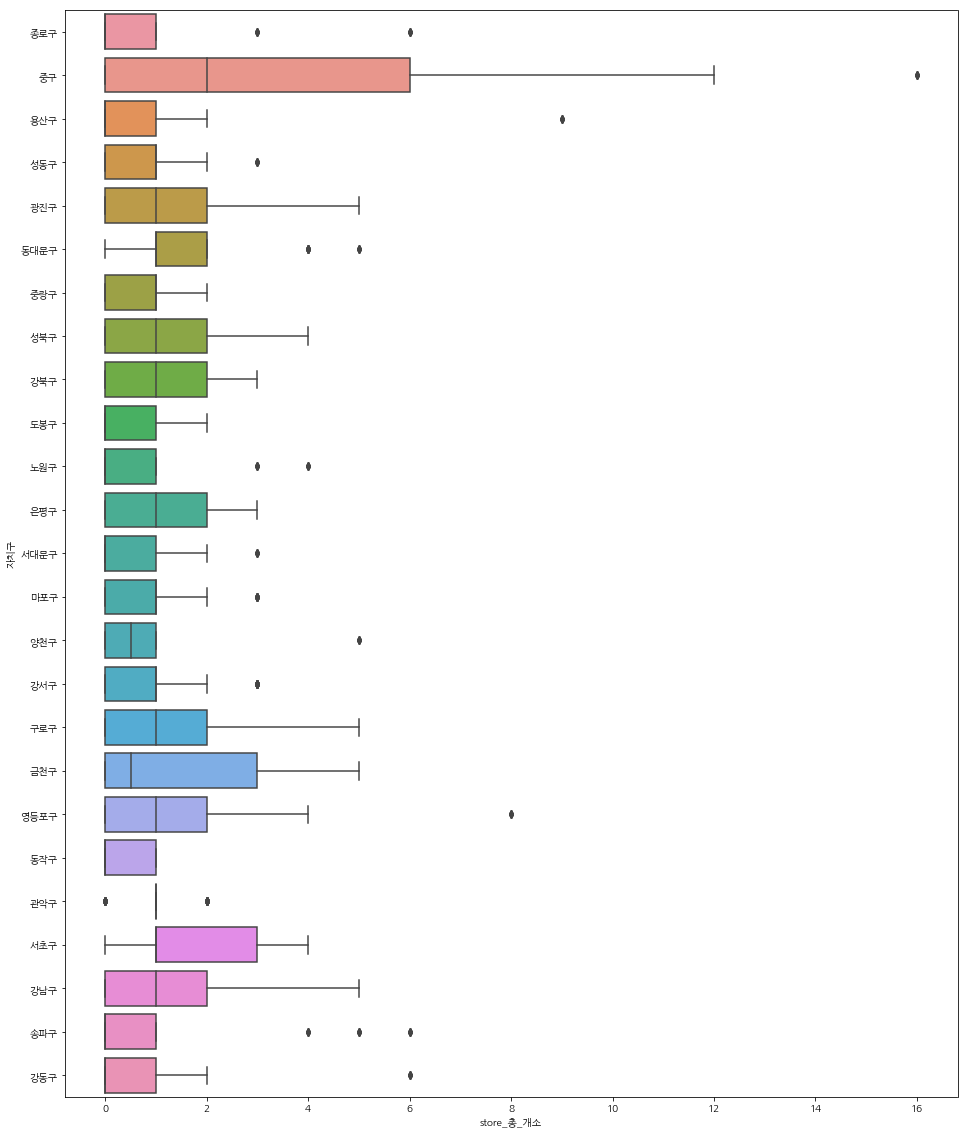

In [181]:
plt.figure(figsize=(16, 20))
ax = sns.boxplot(x="store_총_개소", y="자치구", data=dong ) # ,showfliers=False

# 행정구역으로 이름 맞추기

In [170]:
a = pd.read_csv('행정동분류.csv')

In [269]:
c = (set(dong.동) - set(a['행정구역명']))

In [262]:
dong.동.replace({'금호2.3가동': '금호2·3가동', '면목3.8동': '면목3·8동',
              '상계3.4동':'상계3·4동', '상계6.7동': '상계6·7동', 
              '종로1.2.3.4가동': '종로1·2·3·4가동','중계2.3동':'중계2·3동' }, inplace=True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [268]:
dong.to_csv('mid_final.csv')

c = set(index1.동)-set(apt_edit.동_x)
index1[(index1['동'].isin(c))].sort_values('자치구')

In [267]:
dong[(dong['동'].str.contains(r'강남'))]

,자치구,동,면적_동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,인구,면적,인구밀도,사용년수,세대수


In [ ]:
[num_company['동'].str.contains(r'{}'.format(i))])

# 구별 데이터 합치기

In [272]:
hihi = pd.read_csv("서울시 구별 연료별 자동차 등록대수.csv", engine='python', encoding='utf-8')

In [278]:
hihi.columns=['자치구', '연료별', '용도별', '승용', '승합', '화물', '특수', '계']

In [284]:
hihi =hihi[['자치구', '연료별', '용도별', '승용', '승합', '화물', '계']]

In [285]:
dong_ff = pd.merge(dong, hihi, on=['자치구'], how='inner')

In [291]:
dong_ff[dong_ff['연료별']=='경유'].head()

,자치구,동,면적_동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,인구,면적,인구밀도,사용년수,세대수,연료별,용도별,승용,승합,화물,계
3,중구,소공동,0.95,3.0,2.0,125379.0,0.0,0.0,0.0,0.0,3918,24.0,921.0,607.0,11403.0,144.0,50.0,2156,2936,0.95,3091,0-5,2351,경유,비사업용,11804.0,2590.0,4809.0,19285.0
4,중구,소공동,0.95,3.0,2.0,125379.0,0.0,0.0,0.0,0.0,3918,24.0,921.0,607.0,11403.0,144.0,50.0,2156,2936,0.95,3091,0-5,2351,경유,사업용,668.0,350.0,1582.0,2724.0
25,중구,소공동,0.95,3.0,2.0,125379.0,0.0,0.0,0.0,0.0,3918,24.0,921.0,607.0,11403.0,144.0,50.0,2156,2936,0.95,3091,5-10,4875,경유,비사업용,11804.0,2590.0,4809.0,19285.0
26,중구,소공동,0.95,3.0,2.0,125379.0,0.0,0.0,0.0,0.0,3918,24.0,921.0,607.0,11403.0,144.0,50.0,2156,2936,0.95,3091,5-10,4875,경유,사업용,668.0,350.0,1582.0,2724.0
47,중구,소공동,0.95,3.0,2.0,125379.0,0.0,0.0,0.0,0.0,3918,24.0,921.0,607.0,11403.0,144.0,50.0,2156,2936,0.95,3091,10-15,1000,경유,비사업용,11804.0,2590.0,4809.0,19285.0


In [292]:
dong_ff[dong_ff.isnull().any(axis=1)]

,자치구,동,면적_동,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,인구,면적,인구밀도,사용년수,세대수,연료별,용도별,승용,승합,화물,계


In [294]:
dong_ff.to_csv('fifi.csv')

In [297]:
dong_ff.corr()

,store_총_개소,백화점_개소,백화점_건물연면적,복합쇼핑몰_개소,복합쇼핑몰_건물연면적,전문점_개소,전문점_건물연면적,합계_사업체수,총_수급자_가구,㎡당 매매평균가,㎡당 전세평균가,수입차합계,수입화물차,수입특수차,주택건설현황,인구,면적,인구밀도,세대수,승용,승합,화물,계
store_총_개소,1.000000,0.398390,0.328359,0.125276,0.144953,0.476015,0.450625,0.617665,0.007723,0.078221,0.158240,0.034191,0.097380,0.048249,0.017233,-0.050055,-0.012370,-0.146122,-0.053196,-0.016606,-0.003954,-0.006708,-0.015654
백화점_개소,0.398390,1.000000,0.574814,0.063580,0.151895,0.116042,0.214802,0.182830,0.024550,0.236370,0.237191,0.145189,0.092653,0.083734,0.035895,-0.010762,0.010558,-0.149676,0.021410,0.006725,-0.000871,-0.002893,0.005430
백화점_건물연면적,0.328359,0.574814,1.000000,0.024473,0.067658,0.279805,0.781923,0.079449,-0.054855,0.214922,0.222830,0.100992,0.120120,0.003518,0.096207,-0.000268,0.029074,-0.111302,0.038836,0.008976,0.000707,0.006775,0.008854
복합쇼핑몰_개소,0.125276,0.063580,0.024473,1.000000,0.762269,-0.024059,-0.015718,0.116964,-0.052815,0.071674,0.070813,0.042567,0.033100,0.034969,-0.030648,-0.016030,0.119308,-0.075629,-0.005088,-0.006843,-0.005524,-0.005023,-0.006939
복합쇼핑몰_건물연면적,0.144953,0.151895,0.067658,0.762269,1.000000,-0.018340,-0.011981,0.075709,-0.052382,0.098927,0.127072,0.124449,0.046047,0.015816,0.006015,-0.055625,0.034690,-0.079366,0.015625,0.004287,-0.002722,-0.003766,0.003065
전문점_개소,0.476015,0.116042,0.279805,-0.024059,-0.018340,1.000000,0.589510,0.327591,0.026092,0.055914,0.098715,0.025911,0.112130,0.007102,0.109115,0.012972,-0.007978,-0.068856,-0.013069,-0.008074,-0.005132,-0.000619,-0.007381
전문점_건물연면적,0.450625,0.214802,0.781923,-0.015718,-0.011981,0.589510,1.000000,0.183337,-0.094696,0.136811,0.161569,0.060849,0.111875,-0.029871,0.091506,-0.025777,0.020318,-0.088708,0.021344,0.003745,0.001268,0.006586,0.004282
합계_사업체수,0.617665,0.182830,0.079449,0.116964,0.075709,0.327591,0.183337,1.000000,-0.086412,0.105625,0.231110,0.181869,0.191874,0.063904,0.085943,0.056597,0.119854,-0.257680,-0.023284,-0.004400,-0.003922,-0.006115,-0.004907
총_수급자_가구,0.007723,0.024550,-0.054855,-0.052815,-0.052382,0.026092,-0.094696,-0.086412,1.000000,-0.361125,-0.415961,-0.275420,-0.266459,-0.125464,-0.259247,0.264796,0.143850,0.034066,0.013953,0.011707,0.021826,0.009310,0.012597
㎡당 매매평균가,0.078221,0.236370,0.214922,0.071674,0.098927,0.055914,0.136811,0.105625,-0.361125,1.000000,0.858813,0.785479,0.559345,0.126440,0.583378,-0.011321,0.055565,-0.204609,0.123464,0.039885,-0.015363,-0.003526,0.033554


apt.동_y = apt.동_y.fillna(apt.동_x)
apt[apt['동_y'].isnull()]['동_y']

apt[apt.duplicated(subset=['동_y'], keep='first')].sort_values(by='동_y')

apt_dup = apt[apt['two'].isin(['금호','당산','문래','보문','삼선','성수','안암','양평','영등포','용산','원효','한강','회현'])]

apt.동_y = apt.동_y.fillna(apt.동_x)
apt[apt['동_y'].isnull()]['동_y']

two = apt[['자치구', '동_y', '㎡당 매매평균가', '㎡당 전세평균가', 'two']]
two.columns= ['자치구', '동', '㎡당 매매평균가', '㎡당 전세평균가', 'two']

two.head()

c =(set(two.동)-set(num_company.동))
e =(set(num_company.동) - set(two.동))

two2 = two[(two['동'].isin(c))]

num_company2 = num_company[(num_company['동'].isin(e))]

two2['one']=two2.동.str[:1]
num_company2['one']=num_company.동.str[:1]

apt1 =two2.merge(num_company2, how = 'left', on =['자치구','one'])

apt1[apt1['two_x'].isin(['번동', '창동', '목동', '묵동'])]

# 번동

apt1['동_x'].iloc[2]='번1동'
apt1['동_x'].iloc[3]='번2동'
apt1['동_x'].iloc[4]='번3동'

# 창동

apt1['동_x'].iloc[12]='창1동'
apt1['동_x'].iloc[13]='창2동'
apt1['동_x'].iloc[14]='창3동'
apt1['동_x'].iloc[15]='창4동'
apt1['동_x'].iloc[16]='창5동'

# 목동

apt1['동_x'].iloc[50]='목1동'
apt1['동_x'].iloc[51]='목2동'
apt1['동_x'].iloc[52]='목3동'
apt1['동_x'].iloc[53]='목4동'
apt1['동_x'].iloc[54]='목5동'

# 묵동 

apt1['동_x'].iloc[82]='묵1동'
apt1['동_x'].iloc[83]='묵2동'

# 합치기 

apt1 = apt1[apt1['two_x'].isin(['번동', '창동', '목동', '묵동'])]

apt1 = apt1[['자치구', '동_x', '㎡당 매매평균가', '㎡당 전세평균가', 'two_x']]

apt1.columns = ['자치구', '동', '㎡당 매매평균가', '㎡당 전세평균가', 'two']

apt1.reset_index(drop = True, inplace =True)

two = two[~two['two'].isin(['번동', '창동', '목동', '묵동'])]

apt1.shape

two.shape

two_final =two.append(apt1)

two_final.shape

c =((set(two_final.동)-set(num_company.동)))|((set(two_final.동)-set(num_store.동)))

two_final.동[two_final['동'].str.contains(r'계동')]

num_company.동[num_company['동'].str.contains(r'오류')]

num_company[num_company['동'].isin(['삼성동', '삼성1동'])]

appended_data = []
for i in c:
    appended_data.append(num_company.동[num_company['동'].str.contains(r'{}'.format(i))])

### 아파트 동명 바꾸기

seoul_dong = pd.read_csv("행정동.txt", sep='\t')

seoul_dong=seoul_dong[seoul_dong.동 != '합계']
seoul_dong=seoul_dong[seoul_dong.동 != '동']
seoul_dong=seoul_dong[seoul_dong.동 != '본청']
seoul_dong=seoul_dong[seoul_dong.동 != '소계']
seoul_dong=seoul_dong[seoul_dong.동 != '기타']

seoul_dong.shape

(set(two_final.동)-set(seoul_dong.동))

two_final.head()

seoul_dong.동[seoul_dong['동'].str.contains(r'동자')]

d = apt[apt['two'].isin(['금호','당산','문래','보문','삼선','성수','안암','양평','영등','용산','원효','한강','회현'])]

# 금호

d.reset_index(drop=True, inplace=True)

d.drop([1,2,3,4,6,7,9,11], inplace=True)

(1056+774)/2

d.sort_values('동_x')[:]

# 당산

d.reset_index(drop=True, inplace=True)

d.drop([30,32,34,36,38,40], inplace=True)

d['동_x'].iloc[239]='창4동'

(1056+774)/2

#문래

d[["㎡당 매매평균가", "㎡당 전세평균가"]].iloc[[41,42,43,44,45]].mean(axis=0)

# ㎡당 매매평균가    636.4
# ㎡당 전세평균가    364.8

m2=[]

m2.append(d[["㎡당 매매평균가"]].iloc[[41,42,43,44,45]].mean(axis=0))

mean_matrix = pd.concat(m2, axis=1).T

mean_matrix

(501.0+731.0+556.0+545.0+571.0)/5

num_company.동[num_company['동'].str.contains(r'문')]

d.sort_values('동_x')[9:]

#문래

d.drop([30,32,34,36,38,40], inplace=True)

#문래

d.drop([30,32,34,36,38,40], inplace=True)

d.sort_values('동_x')[9:]

#문래

d.drop([30,32,34,36,38,40], inplace=True)

d.sort_values('동_x')[9:]

#문래

d.drop([30,32,34,36,38,40], inplace=True)

d.sort_values('동_x')[9:]

#문래

d.drop([30,32,34,36,38,40], inplace=True)

d.sort_values('동_x')[9:]

apt[apt['two'].isin(['금호','당산','문래','보문','삼선','성수','안암','양평','영등포','용산','원효','한강','회현'])]